NORMALIZATION

1.)MIN MAX SCALING

In [23]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

In [24]:
df=pd.read_csv('wine_data.csv')
df=df.iloc[:,:3]
df.columns=['calss label ','alcohol','malic acid']
df

,calss label,alcohol,malic acid
0,1,13.20,1.78
1,1,13.16,2.36
2,1,14.37,1.95
3,1,13.24,2.59
4,1,14.20,1.76
...,...,...,...
172,3,13.71,5.65
173,3,13.40,3.91
174,3,13.27,4.28
175,3,13.17,2.59


C:\Users\Prakhar\AppData\Local\Temp\ipykernel_24240\4223865561.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['alcohol'],hist=False)


<Axes: xlabel='alcohol', ylabel='Density'>

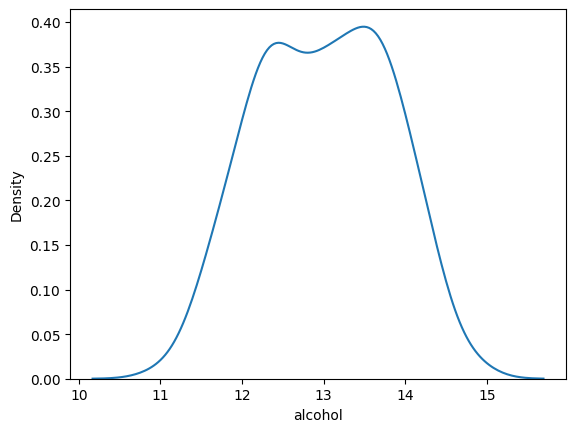

In [25]:
sns.distplot(df['alcohol'],hist=False)

<Axes: xlabel='alcohol', ylabel='malic acid'>

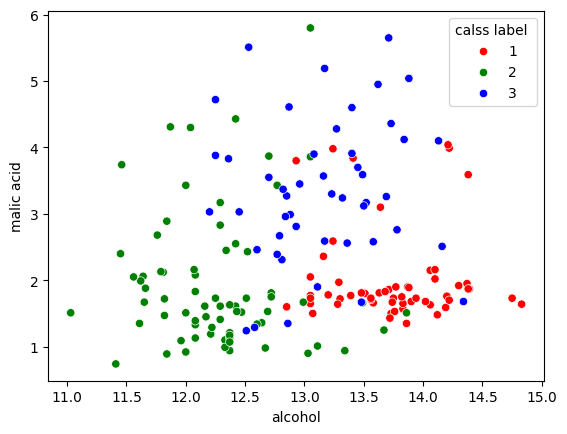

In [26]:
color_dict={1:'red',2:'green',3:"blue"}
sns.scatterplot(x=df['alcohol'],y=df['malic acid'],hue=df['calss label '],palette=color_dict)

step1: train test split

In [27]:
from sklearn.model_selection import train_test_split
x=df.iloc[:,1:]
y=df.iloc[:,0]
x_train,x_test,y_train,_y_test=train_test_split(x,y,test_size=0.3)
x_train.shape,x_test.shape

((123, 2), (54, 2))

step2: NORMALIZATION

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

scaler.fit(x_train)

x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

step 3: converting into data frame 

In [29]:
x_train_scaled=pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled=pd.DataFrame(x_test_scaled,columns=x_test.columns)

x_train

,alcohol,malic acid
111,11.76,2.68
148,13.08,3.90
2,14.37,1.95
108,11.61,1.35
84,12.67,0.98
...,...,...
120,11.56,2.05
61,13.67,1.25
98,12.29,3.17
95,11.81,2.12


effect of normalization

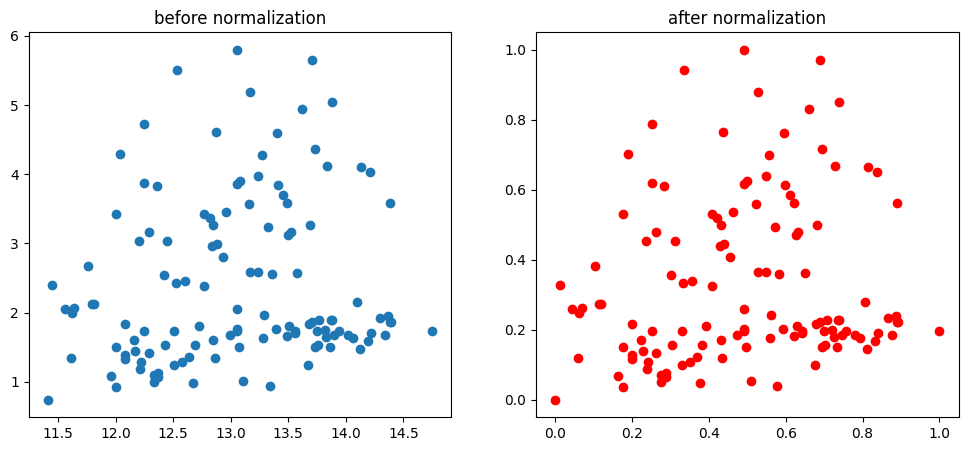

In [35]:
fig,(ax1,ax2)= plt.subplots(ncols=2,figsize=(12,5))
ax1.scatter(x_train['alcohol'],x_train['malic acid'])
ax1.set_title('before normalization')

ax2.scatter(x_train_scaled['alcohol'],x_train_scaled['malic acid'],color='red')
ax2.set_title('after normalization')

plt.show()